In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [44]:
from skimage import data, color
from skimage.filters import try_all_threshold, threshold_local, threshold_otsu

In [72]:
image = plt.imread('./image18-1-6.jpg')
chess = plt.imread('./image18-1-8.jpg')
fruits = plt.imread('./image-18-1-10.jpg')
tools = plt.imread('./image-18-1-11.jpg')

# Make images come alive with scikit-image

In [7]:
def show_image(image, title='Image', cmap_type='gray', ax=None):
    if ax == None:
        plt.imshow(image, cmap=cmap_type)
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        ax.imshow(image, cmap=cmap_type)
        ax.set(title=title)
        ax.axis('off')

## Is this gray or full of color?

In [4]:
coffee_img = data.coffee()
coins_img = data.coins()

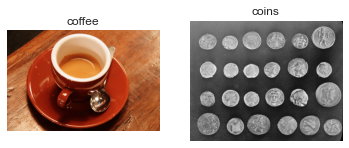

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)

show_image(coffee_img,
           title='coffee',
           ax=ax1)
show_image(coins_img,
           title='coins',
           ax=ax2)

plt.show()

## RGB to grayscale

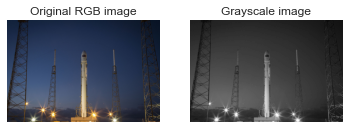

In [20]:
rocket = data.rocket()

# convert to gray
rocket_gray = color.rgb2gray(rocket)

fig, (ax1, ax2) = plt.subplots(1, 2)

show_image(rocket,
           'Original RGB image',
           ax=ax1)

show_image(rocket_gray,
           'Grayscale image',
           ax=ax2)

plt.show()

# `numpy` for images

## Flipping out

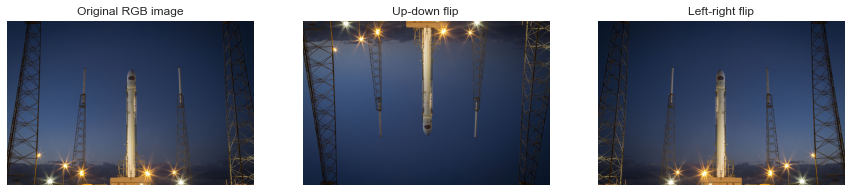

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))

show_image(rocket,
           'Original RGB image',
           ax=ax1)

show_image(np.flipud(rocket),
           'Up-down flip',
           ax=ax2)

show_image(np.fliplr(rocket),
           'Left-right flip',
           ax=ax3)

plt.show()

## Histograms

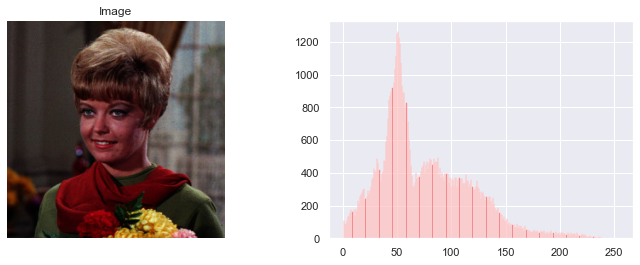

In [42]:
r_channel = image[:, :, 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

show_image(image,
           ax=ax1)

sns.distplot(r_channel.ravel(),
             bins=256,
             kde=False,
             color='red',
             ax=ax2)

plt.show()

# Getting started with thresholding

## Apply global thresholding

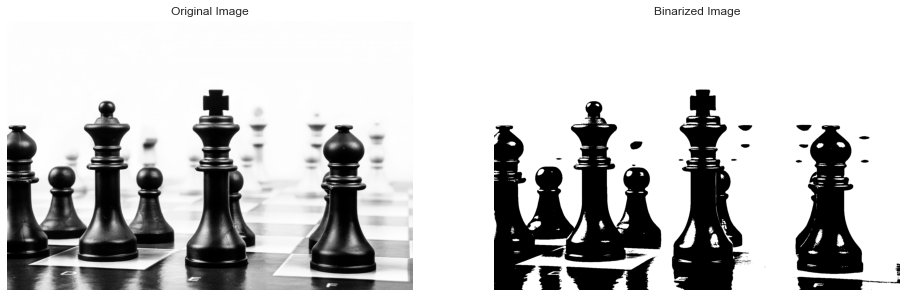

In [50]:
# make image grayscale
chess_gray = color.rgb2gray(chess)

# obtain otsu threshold
thresh = threshold_otsu(chess_gray)

# apply thresholding
binary = chess_gray > thresh

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

show_image(chess,
           title='Original Image',
           ax=ax1)

show_image(binary,
           title='Binarized Image',
           ax=ax2)

plt.show()

## When the background isn't that obvious

In [65]:
page = data.page()

In [68]:
# obtain global thresh via otsu
global_thresh = threshold_otsu(page)

# segment
binary_global = page > global_thresh

# obtain optimal local thresh
local_thresh = threshold_local(page, 35, offset=10)

# segment
binary_local = page > local_thresh

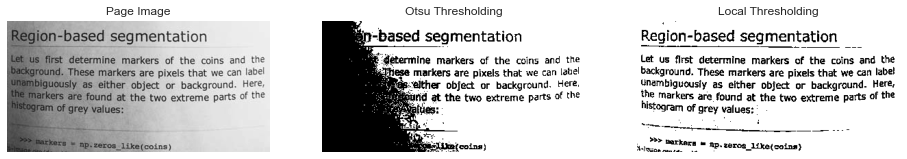

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(16, 9))

show_image(page,
           title='Page Image',
           ax=axs[0])

show_image(binary_global,
           title='Otsu Thresholding',
           ax=axs[1])

show_image(binary_local,
           title='Local Thresholding',
           ax=axs[2])

plt.show()

## Trying other methods

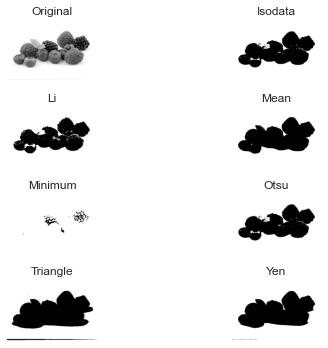

In [71]:
fruits_gray = color.rgb2gray(fruits)

# try all thresh methods on it
fig, ax = try_all_threshold(fruits_gray, verbose=False)

plt.show()

## Apply thresholding

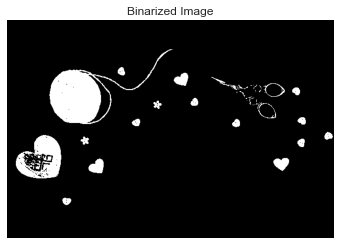

In [77]:
tools_gray = color.rgb2gray(tools)

thresh = threshold_otsu(tools_gray)

binary_img = tools_gray > thresh

show_image(binary_img, 'Binarized Image')